# 📄 Resume Categorization via K-Nearest Neighbor Classifier

## 🎛️ Setting up Preliminaries

set of libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

user-defined function

In [2]:
# a function to remove punctuations by sentence
def remove_punctuations(text):
    text = re.sub('http\S+\s*', ' ', text)  # remove URLs
    text = re.sub('RT|cc', ' ', text)  # remove RT and cc
    text = re.sub('#\S+', '', text)  # remove hashtags
    text = re.sub('@\S+', '  ', text)  # remove mentions
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)  # remove punctuations
    text = re.sub(r'[0-9]+',r' ', text) 
    text = re.sub(r'[^\x00-\x7f]',r' ', text) 
    text = re.sub('\s+', ' ', text)  # remove extra whitespace
    return text

# a function to remove stopwords of a column of list of strings
def remove_stopwords(clean_text):
    additional_stopwords = ['january', 'february', 'march', 'april', 'may', 'june',
                            'july', 'august', 'september', 'october', 'november', 'december']
    sentence = []
    for text in clean_text:
        text = text.lower()
        tokenized_text = word_tokenize(text)
        tokenized_text_without_sw = [word for word in tokenized_text if not word in stopwords.words('english') + additional_stopwords]
        text = " ".join(tokenized_text_without_sw)
        sentence.append(text)
    return sentence

# a function to vectorize document for word2vec word-embeddings
def documentVectorizer(list_of_docs, model):
    features = []
    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis = 0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features

loading up the dataset

In [3]:
df = pd.read_csv("UpdatedResumeDataSet.csv")

## 🛠️ Text Pre-Processing

In [4]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [5]:
df.shape # returns the number of rows and columns

(962, 2)

In [6]:
df.Category.unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

### Dealing with missing values

In [7]:
df.isna().sum()

Category    0
Resume      0
dtype: int64

no missing value found

### Removing punctuations

In [8]:
import re

In [9]:
df['cleaned_Resume'] = df.Resume.apply(lambda x: remove_punctuations(x))
df.head()

,Category,Resume,cleaned_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May to May B E UIT RGPV Data...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


### Removing stopwords

In [10]:
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [11]:
df['cleaned_Resume'] = remove_stopwords(df['cleaned_Resume'])
df.head()

,Category,Resume,cleaned_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details b e uit rgpv data scientist ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas interest deep learning control system de...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...


### Encoding category

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
encode = LabelEncoder()

Before encoding the category column, we might want to see their respective labels first..

In [14]:
data = {'Category':  df['Category'],
        'Encoding': encode.fit_transform(df['Category'])}
label_df = pd.DataFrame(data)
label_df = label_df.sort_values(by = ['Encoding'])
label_df.drop_duplicates(subset = ['Encoding'], inplace = True)
label_df

,Category,Encoding
86,Advocate,0
111,Arts,1
458,Automation Testing,2
878,Blockchain,3
429,Business Analyst,4
305,Civil Engineer,5
0,Data Science,6
735,Database,7
616,DevOps Engineer,8
849,DotNet Developer,9


Now, to encode the Category labels

In [15]:
df['Category'] = encode.fit_transform(df['Category'])
df.head()

,Category,Resume,cleaned_Resume
0,6,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,education details b e uit rgpv data scientist ...
2,6,"Areas of Interest Deep Learning, Control Syste...",areas interest deep learning control system de...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...


## 📊 Data Visualization

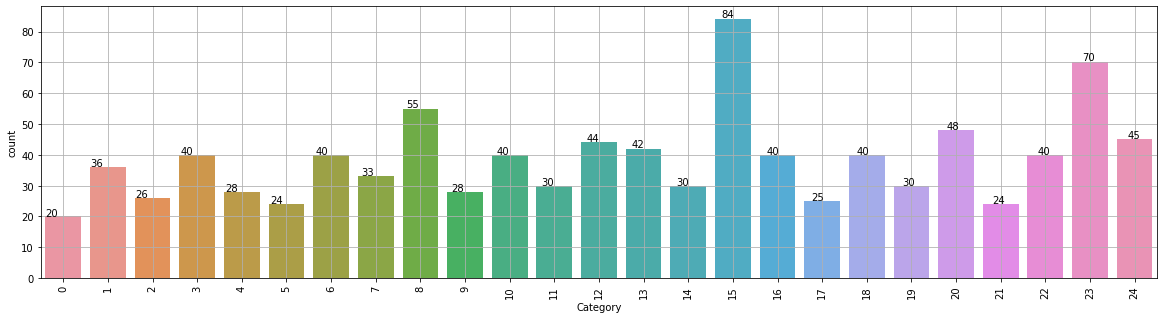

In [16]:
plt.figure(figsize = (20,5))
plt.xticks(rotation = 90)
ax = sns.countplot(x = "Category", data = df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

In [17]:
totalWords = []
cleanedSentence = ""
Sentences = df['cleaned_Resume'].values

for records in Sentences:
    cleanedText = records
    cleanedSentence += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        totalWords.append(word)

WordCloud package requires Anaconda setup of Jupyter Lab/Jupyter Notebook. 
To install the package, run the line below in Anaconda CMD.exe prompt.<br><br>pip install wordcloud

In [18]:
from wordcloud import WordCloud #pip install wordcloud in Anaconda CMD.exe prompt is required

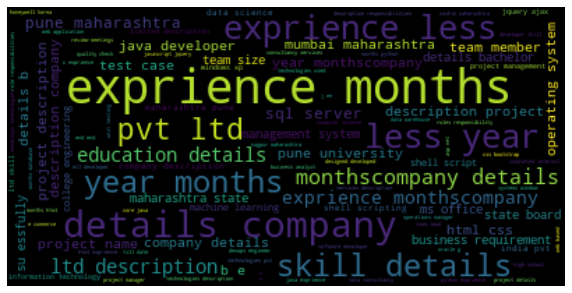

In [19]:
wc = WordCloud().generate(cleanedSentence)
plt.figure(figsize = (10,10))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()

## 🔢 Word Embedding

### 1. TF-IDFVectorizer

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
requiredResumeText = df['cleaned_Resume'].values
tfidfvectorizer = TfidfVectorizer(sublinear_tf = True)

convert the raw data into term-document matrix with TF-IDF features

In [22]:
tfidfvectorizer.fit(requiredResumeText)
WordFeatures_tfidf = tfidfvectorizer.transform(requiredResumeText)

### 2. Word2Vec

required package for Word2Vec

In [23]:
#!pip install gensim

In [24]:
import gensim

In [25]:
resume_split = df.cleaned_Resume.apply(lambda x: x.split(" "))

In [26]:
word2vec = gensim.models.Word2Vec(window = 7, min_count = 0, workers = 4)
word2vec.build_vocab(resume_split, progress_per = 1000)
word2vec.train(resume_split, total_examples = word2vec.corpus_count, epochs = word2vec.epochs)

(1404164, 1512390)

testing the word vectors

In [27]:
word2vec.wv.most_similar("css")

[('html', 0.9866856336593628),
 ('javascript', 0.9825820922851562),
 ('jquery', 0.9806575179100037),
 ('bootstrap', 0.9702085256576538),
 ('angular', 0.9680804014205933),
 ('js', 0.9672293066978455),
 ('php', 0.9659874439239502),
 ('linq', 0.962022602558136),
 ('kendoui', 0.9574536681175232),
 ('spring', 0.9530666470527649)]

creating document vectors from word2vec model

In [28]:
WordFeatures_word2vec = documentVectorizer(resume_split, word2vec)
WordFeatures_word2vec = np.array(WordFeatures_word2vec)

## ⚙️ Model Training

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [30]:
requiredTarget = df['Category'].values

### 1. TF-IDFVectorizer

In [31]:
X_train, X_test_tfidf, Y_train, Y_test_tfidf = train_test_split(WordFeatures_tfidf, requiredTarget, random_state = 42,
                                                                test_size = 0.2, shuffle = True, stratify = requiredTarget)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.25, random_state = 8)

In [32]:
clf_tfidf = OneVsRestClassifier(KNeighborsClassifier())
clf_tfidf.fit(X_train, Y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [33]:
print('Accuracy of KNeighbors Classifier with TF-IDF Vectorizer on training set: {:.2f}'.format(clf_tfidf.score(X_train, Y_train)))
print('Accuracy of KNeighbors Classifier with TF-IDF Vectorizer on validation set: {:.2f}'.format(clf_tfidf.score(X_val, Y_val)))

Accuracy of KNeighbors Classifier with TF-IDF Vectorizer on training set: 0.98
Accuracy of KNeighbors Classifier with TF-IDF Vectorizer on validation set: 0.98


###  2. Word2Vec

In [34]:
X_train, X_test_word2vec, Y_train, Y_test_word2vec = train_test_split(WordFeatures_word2vec, requiredTarget, random_state = 42,
                                                                      test_size = 0.2, shuffle = True, stratify = requiredTarget)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.25, random_state = 8)

In [35]:
clf_word2vec = OneVsRestClassifier(KNeighborsClassifier())
clf_word2vec.fit(X_train, Y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [36]:
print('Accuracy of KNeighbors Classifier with Word2Vec on training set: {:.2f}'.format(clf_word2vec.score(X_train, Y_train)))
print('Accuracy of KNeighbors Classifier with Word2Vec on validation set: {:.2f}'.format(clf_word2vec.score(X_val, Y_val)))

Accuracy of KNeighbors Classifier with Word2Vec on training set: 0.91
Accuracy of KNeighbors Classifier with Word2Vec on validation set: 0.89


## 🧪 Model Testing

Prediction for both word embeddings on KNeighbors Classifier

In [37]:
prediction_tfidf = clf_tfidf.predict(X_test_tfidf)
prediction_word2vec = clf_word2vec.predict(X_test_word2vec)

## ✅ Evaluation

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

**Accuracy**

In [39]:
result_tfidf = metrics.classification_report(Y_test_tfidf, prediction_tfidf)
result_word2vec = metrics.classification_report(Y_test_word2vec, prediction_word2vec)

In [40]:
print(result_tfidf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.71      0.83         7
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       0.80      1.00      0.89         8
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00         5
          10       0.89      1.00      0.94         8
          11       0.86      1.00      0.92         6
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00         8
          17       1.00    

In [41]:
print(result_word2vec)

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.62      0.71      0.67         7
           2       1.00      0.40      0.57         5
           3       0.67      1.00      0.80         8
           4       0.75      1.00      0.86         6
           5       1.00      0.20      0.33         5
           6       0.56      0.62      0.59         8
           7       1.00      0.86      0.92         7
           8       1.00      0.91      0.95        11
           9       0.50      0.20      0.29         5
          10       1.00      1.00      1.00         8
          11       0.86      1.00      0.92         6
          12       1.00      0.67      0.80         9
          13       0.80      1.00      0.89         8
          14       0.67      1.00      0.80         6
          15       0.88      0.82      0.85        17
          16       0.67      1.00      0.80         8
          17       1.00    

### Error Analysis

**Confusion Matrix**

Text(159.0, 0.5, 'Predicted')

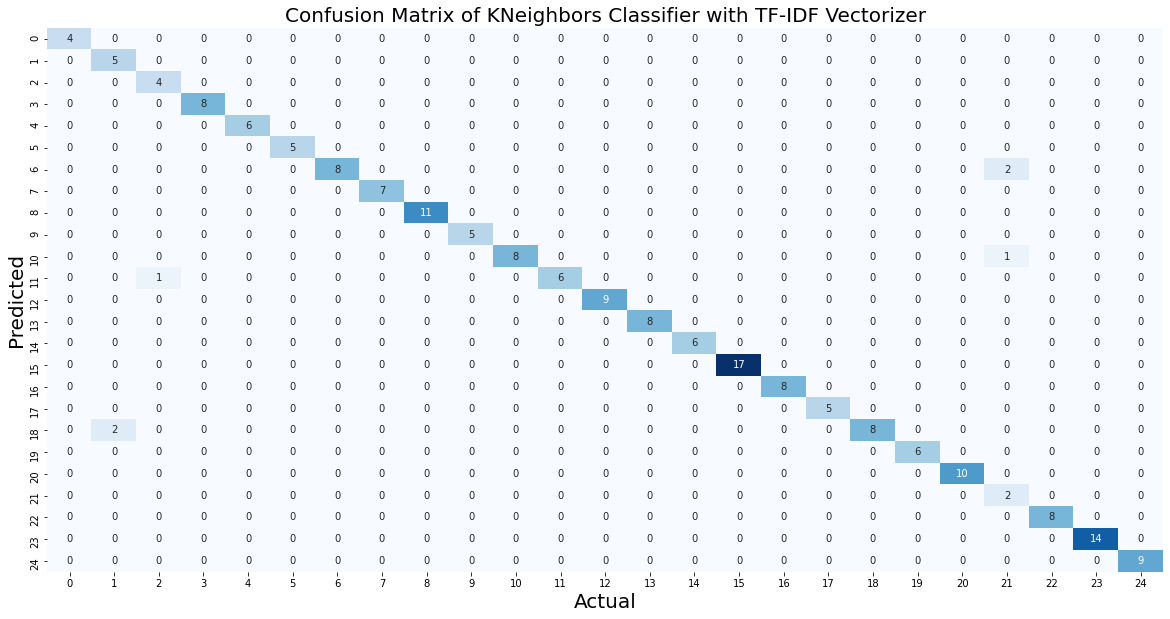

In [42]:
cf_matrix_tfidf = (confusion_matrix(Y_test_tfidf, prediction_tfidf))
cf_matrix_tfidf = np.transpose(cf_matrix_tfidf)

plt.figure(figsize = (20, 10))
sns.heatmap(cf_matrix_tfidf, annot = True, cmap = 'Blues', fmt = 'g', cbar = False)
plt.title('Confusion Matrix of KNeighbors Classifier with TF-IDF Vectorizer', fontsize = 20)
plt.xlabel('Actual', fontsize = 20)
plt.ylabel('Predicted', fontsize = 20)

Text(159.0, 0.5, 'Predicted')

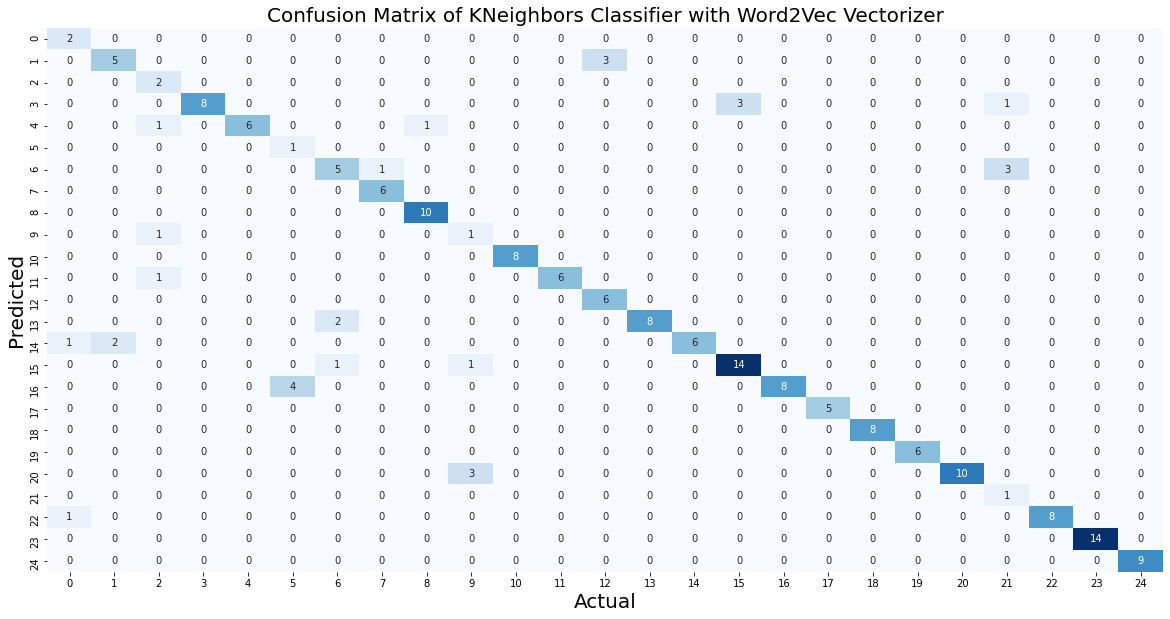

In [43]:
cf_matrix_word2vec = (confusion_matrix(Y_test_word2vec, prediction_word2vec))
cf_matrix_word2vec = np.transpose(cf_matrix_word2vec)

plt.figure(figsize = (20, 10))
sns.heatmap(cf_matrix_word2vec, annot = True, cmap = 'Blues', fmt = 'g', cbar = False)
plt.title('Confusion Matrix of KNeighbors Classifier with Word2Vec Vectorizer', fontsize = 20)
plt.xlabel('Actual', fontsize = 20)
plt.ylabel('Predicted', fontsize = 20)